## Linear Regression
## in simple linear regression there is 1 dependent variable(y or label) and 1 independent variable(X,Feature)¶


In [1]:
# y = mx + c
#m=slope
#c=intercept
#m,c are the coefficients of function
# in linear regresion this eqn is stated as 
#y^ = B1x + B0

In [2]:
 #best fit line
#residual = error = diffrence btn actual value and value predicted with line
#to find the best fit line we use ordinary least squares method(OLS)
#Residual sum of sqaures= RSS = e1**2+e2**2+....+en**2
#we would like to minimize RSS
#y^ = B1x + B0
#ei = yi - ypred
#RSS = (y1-B0-B1X1)**2+(y2-B0-B2X2)**2+...(yn-B0-BnXn)
#RSS = summation(yi-B0-BiXi)
#to minimize RSS we have to find best posible values for B0 and B1
#y = m1x1+m2x2+...mnxn+c
#y^=B1x1+B2x2+....Bnxn+B0

#### y = mx + c
#### y = b0 + b1x
#### y= c+ m1x1 +m2x2 +m3x3....mnxn
#### y = B0 + B1x1 +B2x2 +B3x3 +...Bnxn
#### if Bi>0 then increase in X, there will increase in y
#### if Bi<0 then increase in X, there will decrease in y

# Assumptions of Linear Regression

### 1. there is a linear relation bten x and y

### 2. Errors terms or residuals are normally distributed.

### 3. Error terms or residuals are independent of each other 

### 4. error terms have constant variance


In [5]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score

In [9]:
df=pd.read_csv('advertising.csv')

In [10]:
df.head()

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9


In [11]:
df.shape

(200, 4)

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   Radio      200 non-null    float64
 2   Newspaper  200 non-null    float64
 3   Sales      200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB


In [13]:
df.describe()

,TV,Radio,Newspaper,Sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,15.130500
std,85.854236,14.846809,21.778621,5.283892
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,11.000000
50%,149.750000,22.900000,25.750000,16.000000
75%,218.825000,36.525000,45.100000,19.050000
max,296.400000,49.600000,114.000000,27.000000


In [14]:
df.isnull().sum()

TV           0
Radio        0
Newspaper    0
Sales        0
dtype: int64

## Visualiting tha Data

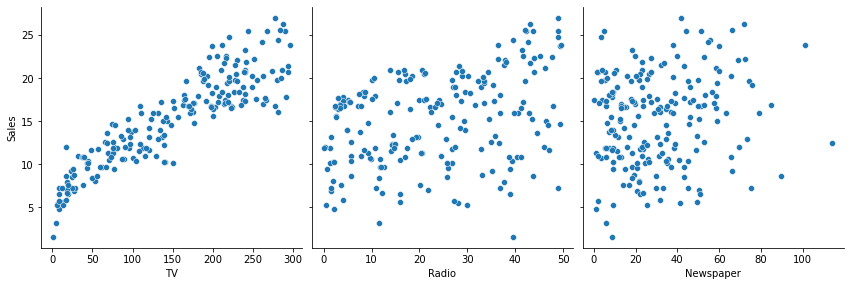

In [15]:
sns.pairplot(x_vars=['TV',"Radio",'Newspaper'],y_vars='Sales',data=df,size=4,aspect=1)

In [18]:
x=df.corr()

In [19]:
x

,TV,Radio,Newspaper,Sales
TV,1.000000,0.054809,0.056648,0.901208
Radio,0.054809,1.000000,0.354104,0.349631
Newspaper,0.056648,0.354104,1.000000,0.157960
Sales,0.901208,0.349631,0.157960,1.000000


<AxesSubplot:>

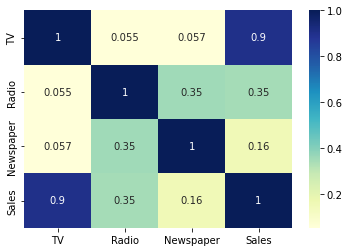

In [21]:
sns.heatmap(x,annot=True,cmap="YlGnBu")

<AxesSubplot:xlabel='TV', ylabel='Sales'>

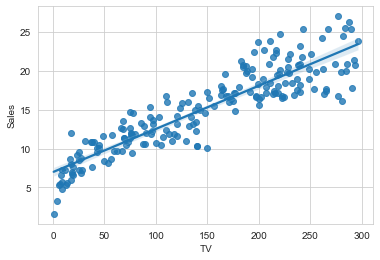

In [22]:
sns.set_style('whitegrid')
sns.regplot(x='TV',y='Sales',data=df)

In [23]:
#all the data points hugging the regression line very closely.
#relation between TV and Sales is found to be positive

<AxesSubplot:xlabel='Radio', ylabel='Sales'>

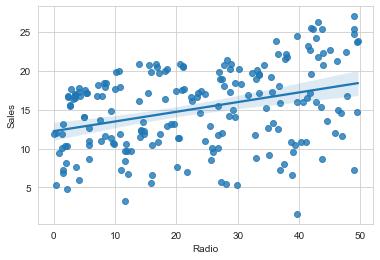

In [25]:
sns.set_style('whitegrid')
sns.regplot(x='Radio',y='Sales',data=df)

In [27]:
#the data points are not close to regression line they are scattered towords the Y axis and slope is also lesser
##relation between Radio and Sales is found to be not smooth as compared to TV 

<AxesSubplot:xlabel='Newspaper', ylabel='Sales'>

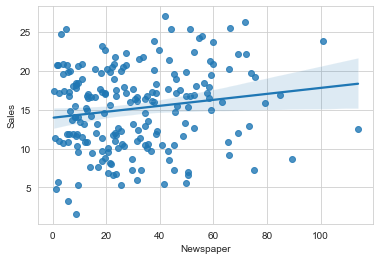

In [28]:
sns.set_style('whitegrid')
sns.regplot(x='Newspaper',y='Sales',data=df)

In [29]:
#it seems to be there is a negative or very less correaltion between newspaper and sales beacuse the data points are more scattered 
#towords y-axis

# As is visible from the pairplot and the heatmap, the variable TV seems to be most correlated with Sales. So let's go ahead and perform simple linear regression using TV as our feature variable.

### In simple linear regression there is one dependent variable and 1 independent variable

In [30]:
X=df['TV']
y=df['Sales']

In [31]:
X_train, X_test, y_train, y_test =train_test_split(X,y,test_size=0.3,random_state=100)

In [36]:
X_train.shape

(140,)

In [37]:
X_test.shape

(60,)

In [38]:
y_train.shape

(140,)

In [39]:
y_test.shape

(60,)

In [40]:
#resahpe the X_train and X_test
X_train = X_train.values.reshape(-1,1)
X_test = X_test.values.reshape(-1,1)

In [41]:
X_test.shape

(60, 1)

In [46]:
X_train.shape

(140, 1)

In [49]:
lm =LinearRegression()

In [50]:
lm

LinearRegression()

In [51]:
model=lm.fit(X_train,y_train)
model

LinearRegression()

In [52]:
#print the coefficients
lm.coef_

array([0.05454575])

In [53]:
#this is coefficient of TV i.e m or B1
#B1 > 0 i.e B1 is positive
#if Bi>0 then increase in X, there will increase in y
#if Bi<0 then increase in X, there will decrease in y

In [54]:
lm.intercept_

6.94868320000136

In [55]:
y=0.05454575 * X_train + 6.948683200001357

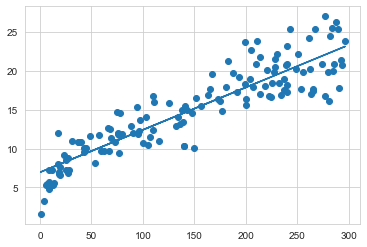

In [56]:
plt.scatter(X_train,y_train)
plt.plot(X_train,0.05454575 * X_train + 6.948683200001357)

In [57]:
y_train_pred =lm.predict(X_train)
y_test_pred =lm.predict(X_test)

In [58]:
print(r2_score(y_train,y_train_pred))
print(r2_score(y_test,y_test_pred))

0.8157933136480388
0.792103160124566


In [59]:
print(mean_absolute_error(y_train,y_train_pred))
print(mean_absolute_error(y_test,y_test_pred))

1.9167796095132974
1.6480589869746525


In [60]:
print(mean_squared_error(y_train,y_train_pred))
print(mean_squared_error(y_test,y_test_pred))

5.752400386486837
4.07755637182695


In [61]:
# RMSE
print(np.sqrt(mean_squared_error(y_train,y_train_pred)))
print(np.sqrt(mean_squared_error(y_test,y_test_pred)))

2.398416224612992
2.0192960089662315


In [62]:
df['Sales'].mean()

15.130500000000005

In [63]:
residual= y_train- y_train_pred

In [64]:
residual.head()

74    -1.588747
3      1.287635
185    4.469437
26     0.256729
90    -0.274178
Name: Sales, dtype: float64

<AxesSubplot:xlabel='Sales', ylabel='Density'>

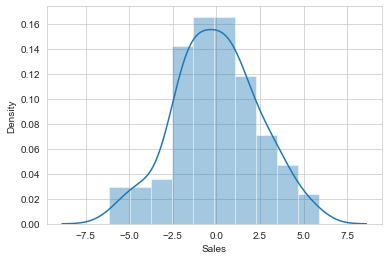

In [65]:
sns.distplot(residual)

In [66]:
#The residuals are normally distributed with a mean 0. All good!
#so fundamental assumption of linear regression is repected in this case.

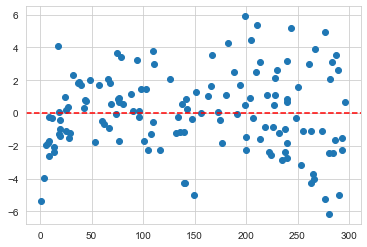

In [67]:
#Looking for patterns in the residuals
plt.scatter(X_train,residual)
plt.axhline(y=0,color='r',ls='--')
plt.show()

In [68]:
#there is no significant pattern as all the residual are scattered around y=0 i.e.mean of residuals is zero.
#so the model is good enough .

In [69]:
#for test data
test_residual=y_test-y_test_pred
test_residual.head()

126   -0.774140
104    0.758518
99     2.876731
92     0.576706
111    1.667608
Name: Sales, dtype: float64

<AxesSubplot:xlabel='Sales', ylabel='Density'>

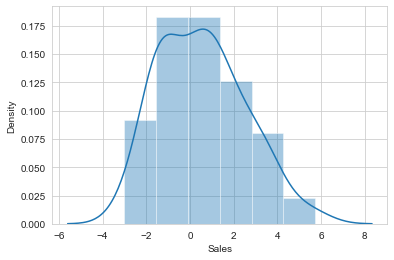

In [70]:
sns.distplot(test_residual)

## Method 2

In [71]:
#method 2
#Statsmodel
#y=mx+c  #linear regression
#y=mx  #statsmodel dont consider the constant (intercept)
# we have to manually add the constant
import statsmodels.api as sm
import numpy as np
#import statsmodels.formula.api as smf

In [72]:
X=df['TV']
y=df['Sales']

In [73]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=100)

In [74]:
X_train_sm = sm.add_constant(X_train)
X_train_sm

,const,TV
74,1.0,213.4
3,1.0,151.5
185,1.0,205.0
26,1.0,142.9
90,1.0,134.3
...,...,...
87,1.0,110.7
103,1.0,187.9
67,1.0,139.3
24,1.0,62.3


In [75]:
lr = sm.OLS(X_train_sm, y_train).fit()

In [76]:
lr.params

,0,1
Sales,0.058525,10.466345


In [77]:
#y(Sales) = 6.94 + 0.05*TV(X)
#if we increase a unit value i.e 1 in X ,then the increase in y should be m i.e.0.05 units